## lesson-2

Библиотеки

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist  # набор для работы

import matplotlib.pyplot as plt

Загрузка данных

In [2]:
(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

In [3]:
# Normalize the images.
train_imagesi = (train_imagesi / 127.5) - 1
test_imagesi = (test_imagesi / 127.5) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


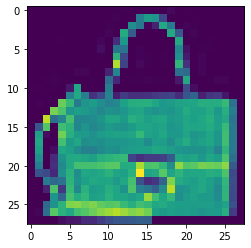

8


In [4]:
n = 2005
plt.imshow(train_imagesi[n,:,:])
plt.show()
print(train_labels[n])

In [5]:
train_labels[:12]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9], dtype=uint8)

In [6]:
train_images[202,150:160]

array([-0.6       , -0.62352941, -0.64705882, -0.56862745, -0.59215686,
       -0.63137255, -0.61568627, -0.61568627, -0.67058824, -0.58431373])

In [7]:
# Превратим выходы в векторые (OHE в keras - from keras.utils import to_categorical)
y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

In [8]:
y_t[:12]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Нейронная сеть

In [9]:
def nn(train_images, test_images, y_t, y_tt, neuron = 100, layer = 2, optimizer='adam', quantity_seed = 5):
    
    metrics_train = []
    metrics_test = []
    
    for _ in range(quantity_seed):
        model = Sequential(name='my_model')
        model.add(Dense(    neuron, activation='relu', input_shape=(784,)))  
        # входной слой + поносвязный слой с активацией ReLU
        for k in range(layer - 1):
          model.add(Dense(  neuron, activation='tanh')) 
          # Скрытый слой k из neuron_numb нейронов с активацией tanh

        model.add(Dense(10, activation='softmax')) 
        # выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    
        model.compile(
          optimizer=optimizer, # оптимизатор
          loss=keras.losses.CategoricalCrossentropy(), # функция потерь
          metrics=['accuracy'], # метрика
        ) 

        # Train the model.
        hh = model.fit(    
          train_images,
          y_t,
          epochs=15,
          batch_size=1024, verbose=0
        )

        # Evaluate the model.
        eval_test = model.evaluate( 
          test_images,
          y_tt, verbose=0
        )
        
        metrics_train.append(hh.history['accuracy'][-1])
        metrics_test.append(eval_test[1])
        
    return np.mean(metrics_train), np.mean(metrics_test)

In [10]:
%%time

nn(train_images, test_images, y_t, y_tt, neuron = 100, layer = 2, optimizer='adam', quantity_seed = 5)

Wall time: 44.6 s


(0.9101866602897644, 0.8807600021362305)

### Зависимость метрик от числа нейронов в слое(для 2-хслойной сети)

In [11]:
%%time

neuron_list = [10, 20, 30, 50, 100, 200, 300, 500, 1000]

metrics_train_neuron = []
metrics_test_neuron = []

for neuron in neuron_list:
    metrics_neuron = nn(train_images, test_images, y_t, y_tt, neuron = neuron, layer = 2, optimizer='adam', quantity_seed = 5)
    print(f'{neuron} - {metrics_neuron}')
    metrics_train_neuron.append(metrics_neuron[0])
    metrics_test_neuron.append(metrics_neuron[1])

10 - (0.8501566648483276, 0.8347199916839599)
20 - (0.8741866707801819, 0.8547399997711181)
30 - (0.8840333342552185, 0.8648800015449524)
50 - (0.895930004119873, 0.8727000117301941)
100 - (0.9100133419036865, 0.8797799944877625)
200 - (0.9219433307647705, 0.883240008354187)
300 - (0.9292999982833863, 0.8840000033378601)
500 - (0.9367799997329712, 0.8848199963569641)
1000 - (0.9412366628646851, 0.8863199830055237)
Wall time: 13min 13s


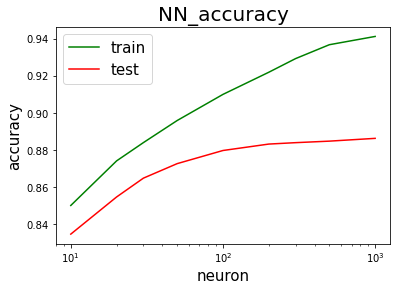

In [12]:
plt.plot(neuron_list, metrics_train_neuron, color = 'green', label = "train")
plt.plot(neuron_list, metrics_test_neuron, color = 'red', label = "test")
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('neuron', fontsize=15)
plt.xscale('log')
plt.ylabel('accuracy', fontsize=15)
plt.legend(prop={'size': 15})
plt.show()

С ростом числа нейронов, растёт метрика как на трейн, так и на тест.

### Зависимость метрик от числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).

Для нашей 2-хслойной модели число тренируемых параметров равно:

In [13]:
count_neuron = lambda neuron, layer: (784 + 1) * neuron + (neuron + 1) * neuron * (layer - 1) + (neuron + 1) * 10

Подберём число нейровнов в слое, чтобы для каждого количества слоёв у нас было близкое число тренируемых парметров

In [14]:
count_neuron(100, 2)

89610

In [15]:
count_neuron(91, 3)

89099

In [16]:
count_neuron(80, 5)

89530

In [17]:
count_neuron(65, 10)

90295

In [18]:
%%time
# Получается
layer_list = [(100, 2), (91, 3), (80, 5), (65, 10)]

metrics_train_layer = []
metrics_test_layer = []

for layer in layer_list:
    metrics_layer = nn(train_images, test_images, y_t, y_tt, neuron = layer[0], layer = layer[1], 
                                                                        optimizer='adam', quantity_seed = 5)
    print(f'{layer} - {metrics_layer}')
    metrics_train_layer.append(metrics_layer[0])
    metrics_test_layer.append(metrics_layer[1])

(100, 2) - (0.9092033267021179, 0.8796599984169007)
(91, 3) - (0.9119300007820129, 0.8791400074958802)
(80, 5) - (0.9134566783905029, 0.879420006275177)
(65, 10) - (0.9079466700553894, 0.8755600094795227)
Wall time: 2min 51s


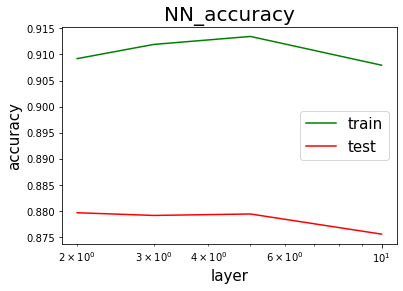

In [19]:
plt.plot(list(map(lambda x: x[1], layer_list)), metrics_train_layer, color = 'green', label = "train")
plt.plot(list(map(lambda x: x[1], layer_list)), metrics_test_layer, color = 'red', label = "test")
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('layer', fontsize=15)
plt.xscale('log')
plt.ylabel('accuracy', fontsize=15)
plt.legend(prop={'size': 15})
plt.show()

С увеличением числа слоёв при близких размерах сети, у нас увеличивается сложность сети и уменьшается потенциал каждого слоя. В данном случае, стратегия вытягивания в длинну нейронной сети неудачная, так как метрики начинают падать.

### Зависимость метрик от разных оптимизаторов (SGD, Adam, RMSProp)

In [20]:
%%time

optimizer_list = ['SGD', 'adam', 'RMSProp']

metrics_train_optimizer = []
metrics_test_optimizer = []

for optimizer in optimizer_list:
    metrics_optimizer = nn(train_images, test_images, y_t, y_tt, neuron = 100, layer = 2, 
                                                                       optimizer=optimizer, quantity_seed = 5)
    print(f'{optimizer} - {metrics_optimizer}')
    metrics_train_optimizer.append(metrics_optimizer[0])
    metrics_test_optimizer.append(metrics_optimizer[1])

SGD - (0.8178099989891052, 0.8079399943351746)
adam - (0.9097533345222473, 0.8794600009918213)
RMSProp - (0.8965233325958252, 0.8672399997711182)
Wall time: 2min 1s


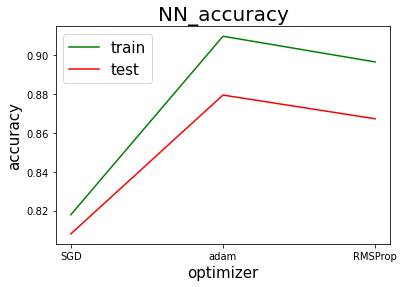

In [21]:
plt.plot(optimizer_list, metrics_train_optimizer, color = 'green', label = "train")
plt.plot(optimizer_list, metrics_test_optimizer, color = 'red', label = "test")
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('optimizer', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.legend(prop={'size': 15})
plt.show()

Самая худшая метрика у модели с оптимизацией 'SGD' - обычный стохастический градиентный спуск. Так как это самый простой оптимайзер. У 'SGD' есть проблема, что при спуске его слишком сильно "трясёт". 'RMSProp' показал себя гораздо лучше, так как он еще пытается меньше реагировать на однотипные данные и больше реагировать на уникальные. 'adam' показал себя лучше всех, так как помимо стратегии 'RMSProp' он еще содержит стратегию накопления момента, тоесть сохраняет инерцию движения.

### Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

Больше всего помогло увеличение числа нейронов в слое до 500 и использование оптимизатора 'adam'.

### Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [22]:
model = Sequential(name='my_model')
model.add(Dense(    100, activation='relu', input_shape=(784,)))  
# входной слой + поносвязный слой с активацией ReLU
for k in range(2 - 1):
    model.add(Dense(  100, activation='tanh')) 
    # Скрытый слой k из neuron_numb нейронов с активацией tanh

model.add(Dense(10, activation='softmax')) 
# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    
model.compile(
    optimizer='adam', # оптимизатор
    loss=keras.losses.CategoricalCrossentropy(), # функция потерь
    metrics=['accuracy'], # метрика
) 

# Train the model.
model.fit(    
    train_images,
    y_t,
    epochs=15,
    batch_size=1024, verbose=0
)

In [23]:
y_pred =  model.predict(test_images)
y_class = np.argmax(y_pred, axis=1)
y_class

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [24]:
def get_confusion_matrix(y_preds_all, y_actual_all, number):
    y_preds = (y_preds_all == number)
    y_actual = (y_actual_all == number)
    
    TP = sum((y_preds == True) & (y_preds == y_actual))
    FP = sum((y_preds == True) & (y_preds != y_actual))
    FN = sum((y_preds == False) & (y_preds != y_actual))
    TN = sum((y_preds == False) & (y_preds == y_actual))
    
    confusion_matrix = pd.DataFrame({'actual_TRUE': [TP, FN], 
                             'actual_False': [FP, TN]}, index = ['preds_TRUE', 'preds_FALSE'])
    
    precision = TP / (TP + FP) # точность
    recall = TP / (TP + FN) # полнота
    
    return confusion_matrix, precision, recall

In [25]:
precision_list = []
recall_list = []

for number in range(10):
    confusion_matrix, precision, recall = get_confusion_matrix(y_class, test_labels, number)
    print(f'confusion_matrix - {number}')
    print(confusion_matrix)
    print(f'precision - {precision}, recall - {recall}\n')
    precision_list.append((number, precision))
    recall_list.append((number, recall))

confusion_matrix - 0
             actual_TRUE  actual_False
preds_TRUE           839           167
preds_FALSE          161          8833
precision - 0.8339960238568589, recall - 0.839

confusion_matrix - 1
             actual_TRUE  actual_False
preds_TRUE           967            13
preds_FALSE           33          8987
precision - 0.986734693877551, recall - 0.967

confusion_matrix - 2
             actual_TRUE  actual_False
preds_TRUE           777           177
preds_FALSE          223          8823
precision - 0.8144654088050315, recall - 0.777

confusion_matrix - 3
             actual_TRUE  actual_False
preds_TRUE           891           131
preds_FALSE          109          8869
precision - 0.8718199608610567, recall - 0.891

confusion_matrix - 4
             actual_TRUE  actual_False
preds_TRUE           848           239
preds_FALSE          152          8761
precision - 0.7801287948482061, recall - 0.848

confusion_matrix - 5
             actual_TRUE  actual_False
preds_TRUE 

In [26]:
sorted(precision_list, key=lambda i : i[1], reverse=True)

[(1, 0.986734693877551),
 (8, 0.965034965034965),
 (5, 0.9605263157894737),
 (9, 0.9450441609421001),
 (7, 0.939060939060939),
 (3, 0.8718199608610567),
 (0, 0.8339960238568589),
 (2, 0.8144654088050315),
 (4, 0.7801287948482061),
 (6, 0.7176220806794055)]

In [27]:
sorted(recall_list, key=lambda i : i[1], reverse=True)

[(1, 0.967),
 (8, 0.966),
 (9, 0.963),
 (5, 0.949),
 (7, 0.94),
 (3, 0.891),
 (4, 0.848),
 (0, 0.839),
 (2, 0.777),
 (6, 0.676)]

#### Вывод:

Экземпляр с меткой класса 6 определяется хуже всех, причём с заметным отрывом. 1, 8, 5, 9 и 7 определяются лучше всех. 3 определяется средне относительно остальных. 0, 2 и 4 определяются ещё хуже.